In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor

In [125]:
#load data
train = pd.read_csv('./data/demand-forecasting/train.csv')
test = pd.read_csv('./data/demand-forecasting/test.csv')
print('Train shape:{}, Test shape:{}'.format(train.shape, test.shape))
train.head()

Train shape:(913000, 4), Test shape:(45000, 4)


date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [126]:
#Number of unique store and item :
print("number of unique items :",train.item.nunique())
print("number of unique store :",train.store.nunique())

number of unique items : 50
number of unique store : 10


In [127]:
train.describe()

store           item          sales
count  913000.000000  913000.000000  913000.000000
mean        5.500000      25.500000      52.250287
std         2.872283      14.430878      28.801144
min         1.000000       1.000000       0.000000
25%         3.000000      13.000000      30.000000
50%         5.500000      25.500000      47.000000
75%         8.000000      38.000000      70.000000
max        10.000000      50.000000     231.000000

In [128]:
train[train['sales'] < 2]

date  store  item  sales
11329   2014-01-09      7     1      1
12050   2015-12-31      7     1      1
64289   2014-01-15      6     4      0
84341   2013-12-12      7     5      1
475123  2013-12-30      1    27      1

In [129]:
train['day'] = pd.DatetimeIndex(train['date']).day
train['month'] = pd.DatetimeIndex(train['date']).month
train['year'] = pd.DatetimeIndex(train['date']).year
train['dayofyear'] = pd.DatetimeIndex(train['date']).dayofyear
train['dayofweek'] = pd.DatetimeIndex(train['date']).dayofweek
train['weekofyear'] =  pd.DatetimeIndex(train['date']).weekofyear
train['is_month_start'] = pd.DatetimeIndex(train['date']).is_month_start
train['is_month_end'] = pd.DatetimeIndex(train['date']).is_month_end

In [130]:
train.head()

date  store  item  sales  day  month  year  dayofyear  dayofweek  \
0  2013-01-01      1     1     13    1      1  2013          1          1   
1  2013-01-02      1     1     11    2      1  2013          2          2   
2  2013-01-03      1     1     14    3      1  2013          3          3   
3  2013-01-04      1     1     13    4      1  2013          4          4   
4  2013-01-05      1     1     10    5      1  2013          5          5   

   weekofyear  is_month_start  is_month_end  
0           1            True         False  
1           1           False         False  
2           1           False         False  
3           1           False         False  
4           1           False         False

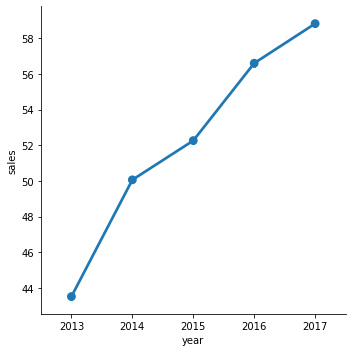

In [132]:
# sales trends by yearsashor
sns.catplot(data = train, x = 'year', y = "sales", kind='point')

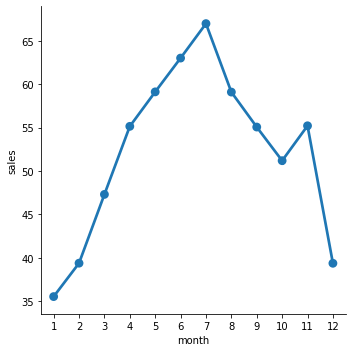

In [37]:
# sales trends by months
sns.catplot(data = train, x = 'month', y = "sales", kind='point')

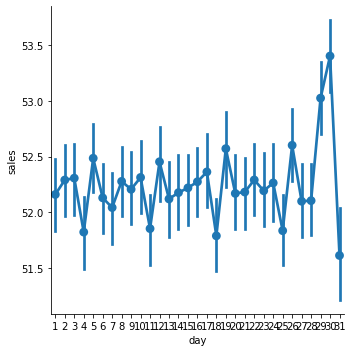

In [133]:
# sales trends by days
sns.catplot(data = train, x = 'day', y = "sales", kind='point')

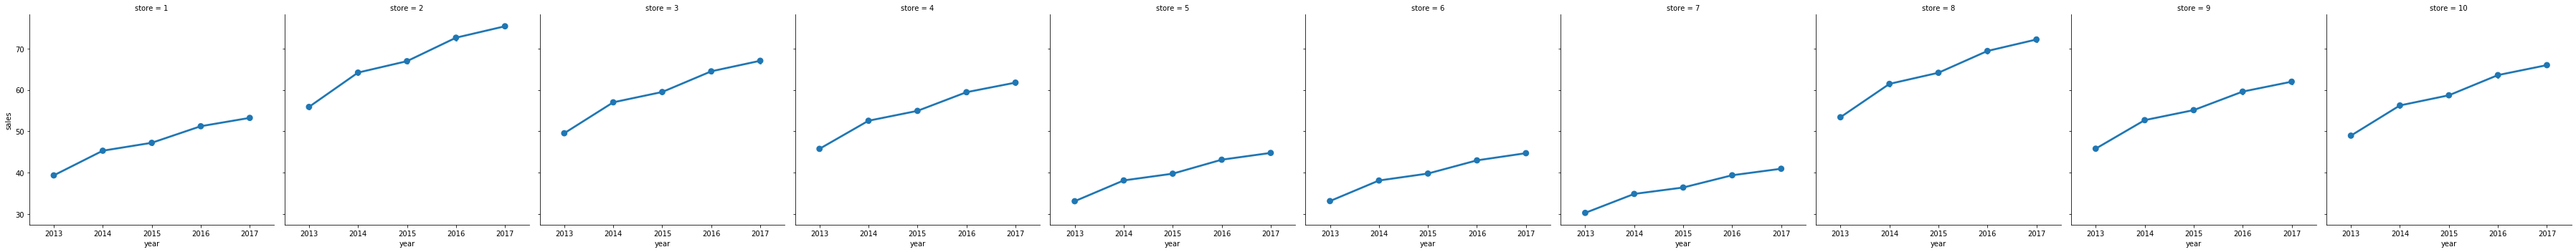

In [134]:
# sales trends, for each store
sns.catplot(data = train, x = 'year', y = "sales", col='store', kind='point')

### Data preparation

In [135]:
train.columns

Index(['date', 'store', 'item', 'sales', 'day', 'month', 'year', 'dayofyear',
       'dayofweek', 'weekofyear', 'is_month_start', 'is_month_end'],
      dtype='object')

In [145]:
#### Train data
train_X = train.copy(deep=True)
train_y = train['sales']

In [146]:
del train_X['sales']
del train_X['date']

In [147]:
train_X

store  item  day  month  year  dayofyear  dayofweek  weekofyear  \
0           1     1    1      1  2013          1          1           1   
1           1     1    2      1  2013          2          2           1   
2           1     1    3      1  2013          3          3           1   
3           1     1    4      1  2013          4          4           1   
4           1     1    5      1  2013          5          5           1   
...       ...   ...  ...    ...   ...        ...        ...         ...   
912995     10    50   27     12  2017        361          2          52   
912996     10    50   28     12  2017        362          3          52   
912997     10    50   29     12  2017        363          4          52   
912998     10    50   30     12  2017        364          5          52   
912999     10    50   31     12  2017        365          6          52   

        is_month_start  is_month_end  
0                 True         False  
1                False         False  
2                False         False  
3                False         False  
4                False         False  
...                ...           ...  
912995           False         False  
912996           False         False  
912997           False         False  
912998           False         False  
912999           False          True  

[913000 rows x 10 columns]

In [148]:
#### Test data
test['day'] = pd.DatetimeIndex(test['date']).day
test['month'] = pd.DatetimeIndex(test['date']).month
test['year'] = pd.DatetimeIndex(test['date']).year
test['dayofyear'] = pd.DatetimeIndex(test['date']).dayofyear
test['dayofweek'] = pd.DatetimeIndex(test['date']).dayofweek
test['weekofyear'] =  pd.DatetimeIndex(test['date']).weekofyear
test['is_month_start'] = pd.DatetimeIndex(test['date']).is_month_start
test['is_month_end'] = pd.DatetimeIndex(test['date']).is_month_end

In [149]:
test

id        date  store  item  day  month  year  dayofyear  dayofweek  \
0          0  2018-01-01      1     1    1      1  2018          1          0   
1          1  2018-01-02      1     1    2      1  2018          2          1   
2          2  2018-01-03      1     1    3      1  2018          3          2   
3          3  2018-01-04      1     1    4      1  2018          4          3   
4          4  2018-01-05      1     1    5      1  2018          5          4   
...      ...         ...    ...   ...  ...    ...   ...        ...        ...   
44995  44995  2018-03-27     10    50   27      3  2018         86          1   
44996  44996  2018-03-28     10    50   28      3  2018         87          2   
44997  44997  2018-03-29     10    50   29      3  2018         88          3   
44998  44998  2018-03-30     10    50   30      3  2018         89          4   
44999  44999  2018-03-31     10    50   31      3  2018         90          5   

       weekofyear  is_month_start  is_month_end  
0               1            True         False  
1               1           False         False  
2               1           False         False  
3               1           False         False  
4               1           False         False  
...           ...             ...           ...  
44995          13           False         False  
44996          13           False         False  
44997          13           False         False  
44998          13           False         False  
44999          13           False          True  

[45000 rows x 12 columns]

In [150]:
#### Test data
test_X = test.copy(deep=True)
del test_X['id']
del test_X['date']
test_X.columns

Index(['store', 'item', 'day', 'month', 'year', 'dayofyear', 'dayofweek',
       'weekofyear', 'is_month_start', 'is_month_end'],
      dtype='object')

In [124]:
test_X

store  item  day  month  year  dayofyear  dayofweek  weekofyear  \
0          1     1    1      1  2018          1          0           1   
1          1     1    2      1  2018          2          1           1   
2          1     1    3      1  2018          3          2           1   
3          1     1    4      1  2018          4          3           1   
4          1     1    5      1  2018          5          4           1   
...      ...   ...  ...    ...   ...        ...        ...         ...   
44995     10    50   27      3  2018         86          1          13   
44996     10    50   28      3  2018         87          2          13   
44997     10    50   29      3  2018         88          3          13   
44998     10    50   30      3  2018         89          4          13   
44999     10    50   31      3  2018         90          5          13   

       is_month_start  is_month_end  
0                True         False  
1               False         False  
2               False         False  
3               False         False  
4               False         False  
...               ...           ...  
44995           False         False  
44996           False         False  
44997           False         False  
44998           False         False  
44999           False          True  

[45000 rows x 10 columns]

In [151]:
test_X.columns

Index(['store', 'item', 'day', 'month', 'year', 'dayofyear', 'dayofweek',
       'weekofyear', 'is_month_start', 'is_month_end'],
      dtype='object')

### Create the  models

In [152]:
# GradientBoostingRegressor model
clf = GradientBoostingRegressor(n_estimators=100, learning_rate=0.25,
        max_depth=1).fit(train_X, train_y)

In [153]:
pred_y = clf.predict(test_X)

In [154]:
print ("Predict ",pred_y)

Predict  [14.42347191 18.29213576 18.29213576 ... 62.23278204 65.0379551
 68.34950541]
